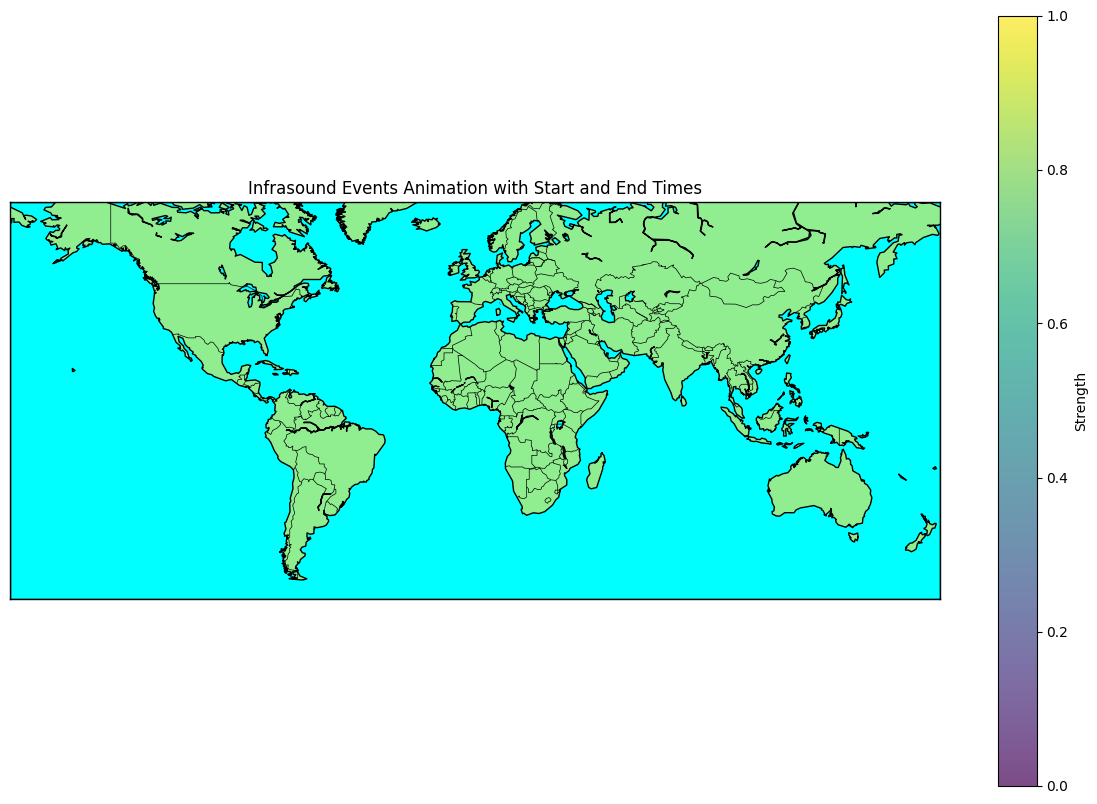

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from mpl_toolkits.basemap import Basemap

# Function to generate random infrasound events with start and end times
def generate_events(num_events, total_frames):
    lats = np.random.uniform(-60, 70, num_events)
    lons = np.random.uniform(-180, 180, num_events)
    strengths = np.random.uniform(1, 10, num_events)
    start_times = np.random.randint(0, total_frames // 2, num_events)
    durations = np.random.randint(total_frames // 4, total_frames // 2, num_events)
    end_times = np.minimum(start_times + durations, total_frames)
    return lats, lons, strengths, start_times, end_times

# Set up the map
fig, ax = plt.subplots(figsize=(15, 10))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=70, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgreen', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Animation parameters
total_frames = 500
num_events = 50

# Generate events
lats, lons, strengths, start_times, end_times = generate_events(num_events, total_frames)

# Convert lat/lon to map coordinates
x, y = m(lons, lats)

# Initial scatter plot (empty)
scat = m.scatter([], [], c=[], s=[], cmap='viridis', alpha=0.7)
plt.colorbar(scat, label='Strength')

# Update function for animation
def update(frame):
    # Determine which events are active in this frame
    active_events = (start_times <= frame) & (frame < end_times)
    
    # Update positions and strengths for active events
    active_x = x[active_events]
    active_y = y[active_events]
    active_strengths = strengths[active_events]
    
    # Add some random movement to active events
    active_x += np.random.uniform(-0.5, 0.5, len(active_x))
    active_y += np.random.uniform(-0.5, 0.5, len(active_y))
    
    # Update scatter plot
    scat.set_offsets(np.c_[active_x, active_y])
    scat.set_array(active_strengths)
    scat.set_sizes(active_strengths * 20)
    
    return scat,

# Create animation
anim = FuncAnimation(fig, update, frames=total_frames, interval=50, blit=True)

plt.title('Infrasound Events Animation with Start and End Times')
plt.show()

# Uncomment the following line to save the animation (requires ffmpeg)
# anim.save('infrasound_events.mp4', writer='ffmpeg', fps=30)